# 1) 데이터 읽기

1. Area: Returns the number of pixels within the boundaries of the rice grain.
2. Perimeter: Calculates the circumference by calculating the distance between pixels around the boundaries of the rice grain.
3. Major Axis Length: The longest line that can be drawn on the rice grain, i.e. the main axis distance, gives.
4. Minor Axis Length: The shortest line that can be drawn on the rice grain, i.e. the small axis distance, gives.
5. Eccentricity: It measures how round the ellipse, which has the same moments as the rice grain, is.
6. Convex Area: Returns the pixel count of the smallest convex shell of the region formed by the rice grain.
7. Extent: Returns the ratio of the region formed by the rice grain to the bounding box pixels
8. Class: Commeo and Osmancik.

In [3]:
import pandas as pd

feature_name = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent', 'Class']
rice = pd.read_csv('./Rice.data', names = feature_name)

rice

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


# 2) 결측치 확인

In [4]:
# 결측치 확인
rice.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

# 3) 클래스 갯수 확인 (그래프, 레이블 갯수)

Text(0.5, 1.0, 'Commeo and Osmancik')

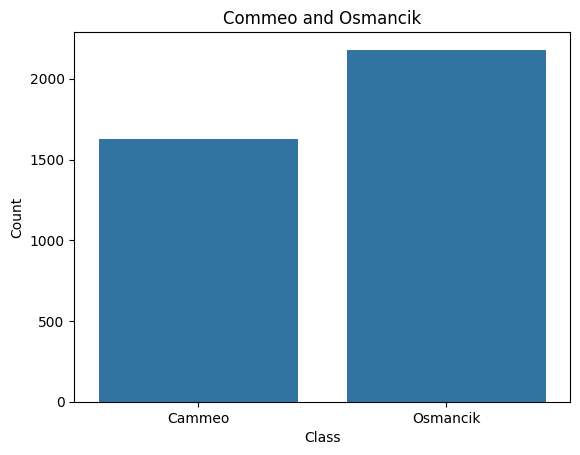

In [5]:
# 레이블 갯수 확인 (그래프)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = rice, x="Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Commeo and Osmancik")

In [6]:
# 레이블 갯수 확인 (숫자)
rice['Class'].value_counts()

Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64

# 5) X, Y 나누기

In [7]:
X = rice.drop('Class', axis = 1)
Y = rice['Class']

print(X.head())
print()
print(Y.value_counts())

    Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231  525.578979         229.749878          85.093788      0.928882   
1  14656  494.311005         206.020065          91.730972      0.895405   
2  14634  501.122009         214.106781          87.768288      0.912118   
3  13176  458.342987         193.337387          87.448395      0.891861   
4  14688  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent  
0        15617  0.572896  
1        15072  0.615436  
2        14954  0.693259  
3        13368  0.640669  
4        15262  0.646024  

Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64


# 6) 데이터 스케일링

In [8]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler


scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled_data,
                            index = X.index,
                            columns = X.columns) 

X

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,1.479830,2.004354,2.348547,-0.212943,2.018337,1.499659,-1.152921
1,1.147870,1.125853,0.988390,0.945568,0.410018,1.192918,-0.602079
2,1.135169,1.317214,1.451908,0.253887,1.212956,1.126504,0.405611
3,0.293436,0.115300,0.261439,0.198051,0.239751,0.233857,-0.275351
4,1.166345,1.487053,1.316442,0.523419,0.952221,1.299855,-0.206013
...,...,...,...,...,...,...,...
3805,-0.708215,-1.078353,-1.048323,-0.097251,-1.085282,-0.745465,0.247031
3806,-0.601988,-0.922926,-1.207208,0.549622,-1.970731,-0.590124,0.418815
3807,-0.133204,-0.329851,-0.298245,0.085220,-0.275099,-0.173068,-0.455731
3808,-1.608257,-1.740320,-1.580971,-1.414414,-0.598821,-1.607156,-0.037168


# 7) One-Hot 인코딩

In [9]:
Y = pd.get_dummies(Y).values

Y

array([[ True, False],
       [ True, False],
       [ True, False],
       ...,
       [False,  True],
       [False,  True],
       [False,  True]])

# 8) Train데이터, Test데이터 나누기

In [10]:
# split X_train, Y_train, X_test, Y_test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# 9) 딥러닝 모델 정의

In [11]:
X_train.shape[0]

3048

## 1. 함수형으로 변환

In [14]:
# 신경망 모델 구축
from keras import Input
from keras import Model
from keras.layers import Dense
from keras.optimizers import Adam

inputs = Input(shape =(7, ))
layer0 = Dense(16, activation = "relu")(inputs)
layer1 = Dense(16, activation = "relu")(layer0)
prediction = Dense(2, activation = "softmax")(layer1)

model = Model(inputs = inputs, outputs = prediction)

model.compile(Adam(learning_rate = 0.04), 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 434 (1.70 KB)

 Trainable params: 434 (1.70 KB)

 Non-trainable params: 0 (0.00 B)

# 10) 학습, 예측

In [15]:
import numpy as np

model_history=model.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test))
y_pred = model.predict(X_test)

# 확률에 가장 가까운 정수로 class를 예측
y_pred_class = np.argmax(y_pred,axis=1)

# y_pred_class one-hot-encoding
Y_pred_class = pd.get_dummies(y_pred_class).values

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8959 - loss: 0.2560 - val_accuracy: 0.9318 - val_loss: 0.1692
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9211 - loss: 0.2015 - val_accuracy: 0.9357 - val_loss: 0.1670
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9299 - loss: 0.1853 - val_accuracy: 0.9318 - val_loss: 0.1726
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9180 - loss: 0.2001 - val_accuracy: 0.9344 - val_loss: 0.1703
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9130 - loss: 0.2086 - val_accuracy: 0.9318 - val_loss: 0.1647
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9285 - loss: 0.1908 - val_accuracy: 0.9370 - val_loss: 0.1647
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9223 - loss: 0.1888 - val_accuracy: 0.9304 - val_loss: 0.1812
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9108 - loss: 0.2092 - val_accuracy: 0.9357 - val_loss:

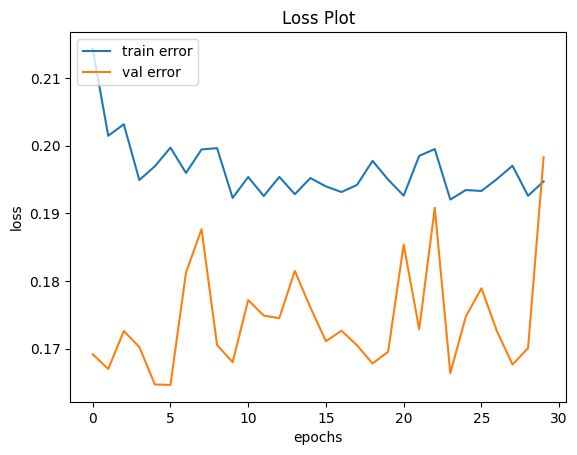

In [16]:
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = model_history.history
loss_values = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc = 'upper left')
plt.show()

In [17]:
from sklearn import metrics

# 정확도 계산
scores = metrics.accuracy_score(Y_test, Y_pred_class)
print(scores)

0.931758530183727


## 2. 드롭아웃 사용해서 성능비교 해 볼 것

In [18]:
# 신경망 모델 구축
from keras import Input
from keras import Model
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout

inputs = Input(shape =(7, ))
layer0 = Dense(16, activation = "relu")(inputs)
layer0 = Dropout(0.5)(layer0)
layer1 = Dense(16, activation = "relu")(layer0)
layer1 = Dropout(0.5)(layer1)
prediction = Dense(2, activation = "softmax")(layer1)

model2 = Model(inputs = inputs, outputs = prediction)

model2.compile(Adam(learning_rate = 0.04), 'categorical_crossentropy', metrics = ['accuracy'])

model2.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 434 (1.70 KB)

 Trainable params: 434 (1.70 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
import numpy as np

model_history=model2.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test))
y_pred = model.predict(X_test)

# 확률에 가장 가까운 정수로 class를 예측
y_pred_class = np.argmax(y_pred,axis=1)

# y_pred_class one-hot-encoding
Y_pred_class = pd.get_dummies(y_pred_class).values

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8418 - loss: 0.3760 - val_accuracy: 0.9134 - val_loss: 0.1977
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8812 - loss: 0.3027 - val_accuracy: 0.9318 - val_loss: 0.1928
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8941 - loss: 0.2995 - val_accuracy: 0.9318 - val_loss: 0.1704
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9025 - loss: 0.2872 - val_accuracy: 0.9318 - val_loss: 0.1795
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8850 - loss: 0.2907 - val_accuracy: 0.9291 - val_loss: 0.1880
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8981 - loss: 0.2614 - val_accuracy: 0.9278 - val_loss: 0.2165
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8859 - loss: 0.2891 - val_accuracy: 0.9173 - val_loss: 0.2003
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8890 - loss: 0.2828 - val_accuracy: 0.9278 - val_loss:

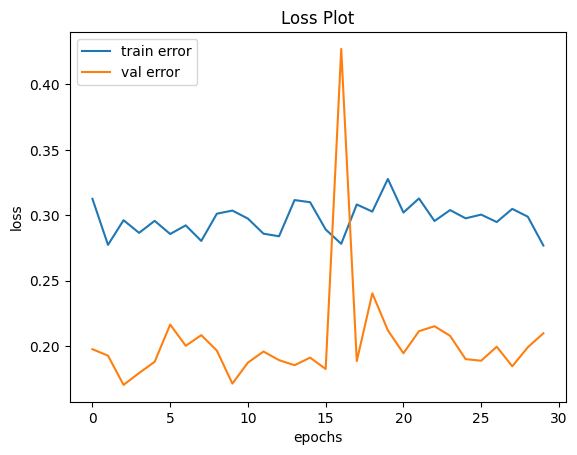

In [20]:
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = model_history.history
loss_values = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc = 'upper left')
plt.show()

In [22]:
from sklearn import metrics

# 정확도 계산
scores = metrics.accuracy_score(Y_test, Y_pred_class)
print(scores)

0.931758530183727


## 3. 조기종료 사용해볼 것

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9295 - loss: 0.1891 - val_accuracy: 0.9304 - val_loss: 0.1680
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9288 - loss: 0.1966 - val_accuracy: 0.9344 - val_loss: 0.1725
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


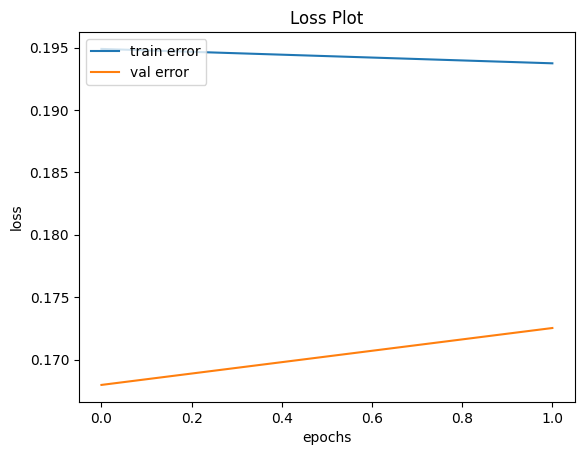

In [23]:
from keras.callbacks import EarlyStopping
import numpy as np

early_stopping = EarlyStopping()

model_history=model.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test), callbacks=[early_stopping])
y_pred = model.predict(X_test)

# 확률에 가장 가까운 정수로 class를 예측
y_pred_class = np.argmax(y_pred,axis=1)

# y_pred_class one-hot-encoding
Y_pred_class = pd.get_dummies(y_pred_class).values
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = model_history.history
loss_values = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc = 'upper left')
plt.show()

In [24]:
from sklearn import metrics

# 정확도 계산
scores = metrics.accuracy_score(Y_test, Y_pred_class)
print(scores)

0.9343832020997376
